### Author - ROHIT RAMGIRE
#### Date : 01/31/2024

In [6]:
## Import packages

import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import tensorflow.keras.activations as activate
import tensorflow.keras.layers as layer
from tensorflow.keras import losses
from tensorflow.keras import models
import matplotlib.pyplot as plt

In [7]:
## Functions for processing data

def split_data(df, percent_split):
    """
    Get a split of data based on % split
    """
    
    train = df.iloc[0:int((percent_split/100)*len(df))]
    test = df.iloc[0:int(((100-percent_split)/100)*len(df))]
    
    return (train,test)

def train_and_predict(df, model, loss, optimizer, metrics, epochs, batch_size,plot_metric_str):
    """
    Splits the data, trains and predicts
    """

    train,test = split_data(df,70)
    train_x = tf.convert_to_tensor(train[['credit_score','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']])
    train_y = tf.convert_to_tensor(train[['churn']])
    test_x = tf.convert_to_tensor(test[['credit_score','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']])
    test_y = tf.convert_to_tensor(test[['churn']])

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=metrics
    )

    history = model.fit(train_x, train_y,epochs = epochs, batch_size = batch_size,validation_data = (test_x,test_y),verbose=False)
    model.evaluate(test_x, test_y, verbose=False)
    
    plt.plot(history.history[plot_metric_str])
    plt.plot(history.history['val_'+plot_metric_str]) 
    plt.title(plot_metric_str)
    plt.ylabel('loss') 
    plt.xlabel('epoch') 
    plt.legend(['train', 'test'], loc='upper left') 
    plt.show()

    preds = model.predict(test_x)

    lst = []
    for i in preds:
        if(i<0.5):
            lst.append(0)
        elif(i>0.5):
            lst.append(1)

    l = [i for i in range(len(lst)) if lst[i]!=test_y[i]]
    acc = 1-(len(l)/len(test_y))
    
    return acc



In [8]:
## Model definition


class Model(tf.keras.Model):
    
    def __init__(self,in_features,hidden0, hidden1, hidden2, out_features,activation1,activation2):
        super(Model,self).__init__()
        self.in_ = layer.Dense(hidden0,input_shape=(in_features,))
        self.fc1 = layer.Dense(hidden1,activation = activation1)
        self.fc2 = layer.Dense(hidden2,activation = activation2)
        self.out = layer.Dense(out_features)
        
    def call(self,x):
        x = self.in_(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        
        return x


In [9]:
## Read data

df = pd.read_csv(r"C:\Users\rramgire\Downloads\Bank Customer Churn Prediction.csv")
df = df.sample(frac=1)

df = df[['credit_score','age','tenure','balance','products_number','credit_card','active_member','estimated_salary','churn']]

Pass 1 - Let us see the training results and accuracy

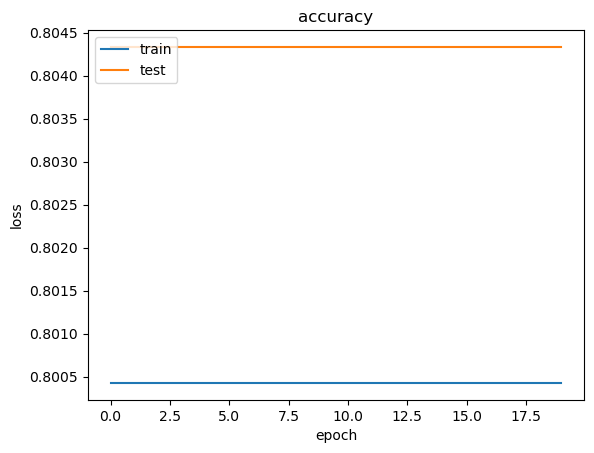

94/94 [==============================] - 0s 730us/step


0.8043333333333333

In [13]:
in_features = 8
hidden0 = 1
hidden1 = 10
hidden2 = 10
out_features = 1
loss = 'binary_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']
plot_metric_str = 'accuracy'
activation1 = 'relu'
activation2 = 'sigmoid'
epochs = 20
batch_size = 20

model = Model(in_features,hidden0, hidden1, hidden2, out_features,activation1,activation2)
train_and_predict(df,model, loss, optimizer, metrics, epochs, batch_size,plot_metric_str)

## Accuracy is 80.4%

No convergence between train and test. Validation loss not changing

Pass 2 - Forgot to normalize data in previous run. After normalizing data \
Using z-score approach \
Metric to be used with Binary Cross Entropy loss is RMSE

https://medium.com/@jwbtmf/loss-metrics-for-deep-learning-binary-cross-entropy-vs-rmse-8cd5fa80a1e5 

Pass a variety of hyperparameters, see model_config below and compare accuracies

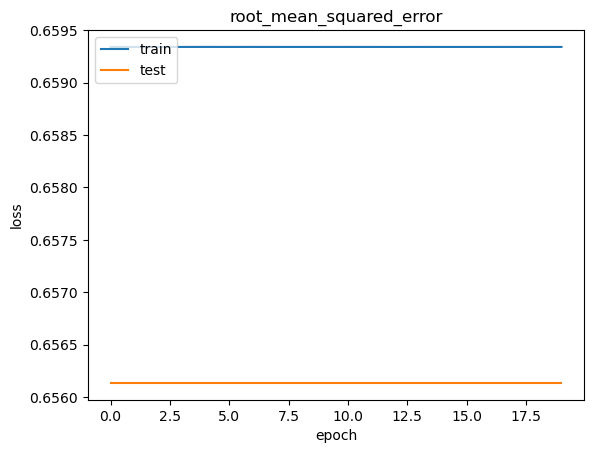

94/94 [==============================] - 0s 673us/step


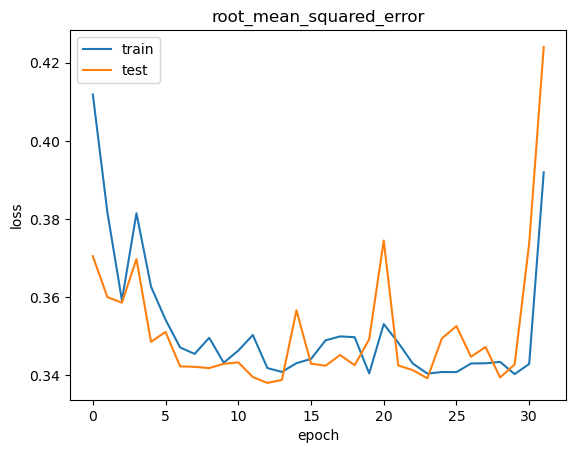

94/94 [==============================] - 0s 671us/step


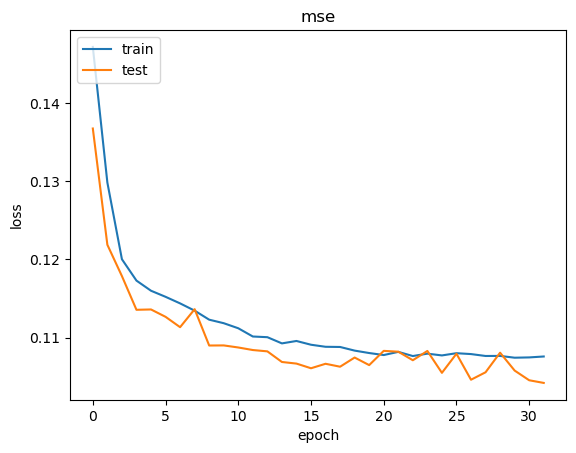

94/94 [==============================] - 0s 647us/step


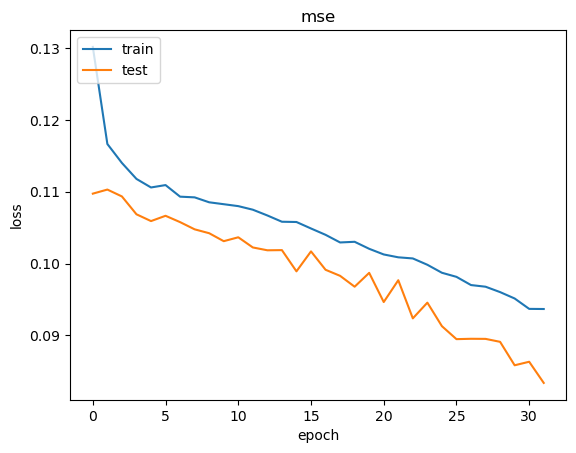

94/94 [==============================] - 0s 709us/step


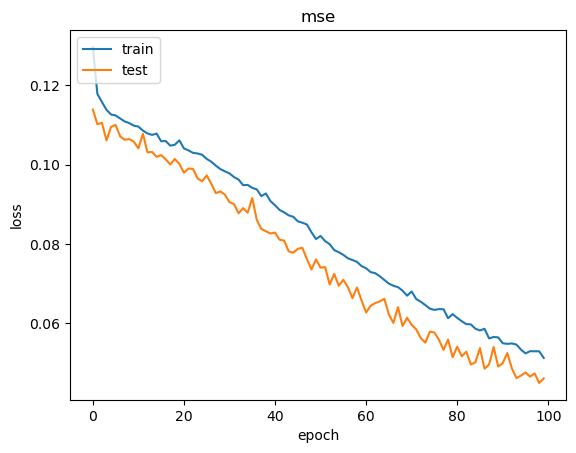

94/94 [==============================] - 0s 692us/step


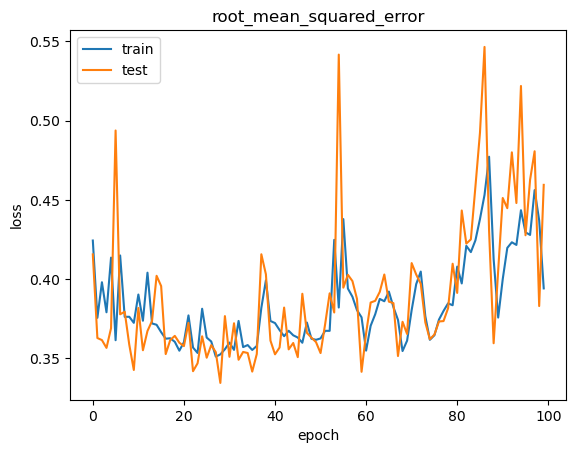

94/94 [==============================] - 0s 671us/step


In [14]:
# ## Read data

df = pd.read_csv(r"C:\Users\rramgire\Downloads\Bank Customer Churn Prediction.csv")
df = df.sample(frac=1)

df = df[['credit_score','age','tenure','balance','products_number','credit_card','active_member','estimated_salary','churn']]

## Normalize data

for i in df.drop(columns = 'churn').columns:
    df[i] = (df[i]-df[i].mean())/df[i].std()
    
model_config = pd.DataFrame(
[[8,1,10,10,1,'binary_crossentropy','adam',tf.keras.metrics.RootMeanSquaredError(),'root_mean_squared_error',20,20,'relu','sigmoid'],
 [8,10,30,30,1,'binary_crossentropy','adam',tf.keras.metrics.RootMeanSquaredError(),'root_mean_squared_error',32,20,'relu','relu'],
 [8,10,30,30,1,'mse','adam','mse','mse',32,20,'relu','sigmoid'],
[8,30,128,128,1,'mse','adam','mse','mse',32,20,'relu','relu'],
[8,128,128,128,1,'mse','adam','mse','mse',100,20,'relu','relu'],
[8,128,128,128,1,'binary_crossentropy','adam',tf.keras.metrics.RootMeanSquaredError(),'root_mean_squared_error',100,20,'relu','relu']],
    
    columns = ['in_features','hidden0','hidden1','hidden2','out_features','loss','optimizer','metrics','plot_metric_str','epochs','batch_size','activation1','activation2']
)
acc_lst = []

for i,row in model_config.iterrows():

    model = Model(row['in_features'],row['hidden0'], row['hidden1'], row['hidden2'], row['out_features'],row['activation1'],row['activation2'])
    
    acc = train_and_predict(df,model, row['loss'], row['optimizer'], row['metrics'], row['epochs'], row['batch_size'],row['plot_metric_str'])
    acc_lst.append(acc)
    acc = acc*100
    
model_config['acc'] = acc_lst

In [16]:
model_config

,in_features,hidden0,hidden1,hidden2,out_features,loss,optimizer,metrics,plot_metric_str,epochs,batch_size,activation1,activation2,acc
0,8,1,10,10,1,binary_crossentropy,adam,RootMeanSquaredError(name=root_mean_squared_er...,root_mean_squared_error,20,20,relu,sigmoid,0.799667
1,8,10,30,30,1,binary_crossentropy,adam,RootMeanSquaredError(name=root_mean_squared_er...,root_mean_squared_error,32,20,relu,relu,0.777667
2,8,10,30,30,1,mse,adam,mse,mse,32,20,relu,sigmoid,0.859667
3,8,30,128,128,1,mse,adam,mse,mse,32,20,relu,relu,0.884667
4,8,128,128,128,1,mse,adam,mse,mse,100,20,relu,relu,0.950667
5,8,128,128,128,1,binary_crossentropy,adam,RootMeanSquaredError(name=root_mean_squared_er...,root_mean_squared_error,100,20,relu,relu,0.859667
